In [1]:
import tensorflow as tf
import numpy as np
from Vgg_class import Vgg_19
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.pyplot as plt
from class_name import class_names 
sess=tf.Session()

In [2]:
train_list=[]
model_path=r'D:\Data warehouse\Model\VGG_16&19\vgg19.npy'
X=tf.placeholder(shape=[2,224,224,3],dtype=tf.float32)

model=Vgg_19(images=X,model_path=model_path,session=sess,train_list=train_list,image_batch_size=2)
prob=tf.nn.softmax(model.score)
# writer=tf.summary.FileWriter('./mylog',sess.graph)


initing model variable!
Init layer:conv5_4
Init layer:conv4_1
Init layer:conv1_1
Init layer:fc7
Init layer:conv4_2
Init layer:conv5_3
Init layer:fc6
Init layer:conv4_4
Init layer:conv2_2
Init layer:conv3_4
Init layer:conv3_2
Init layer:conv5_1
Init layer:conv3_3
Init layer:conv3_1
Init layer:conv4_3
Init layer:conv2_1
Init layer:fc8
Init layer:conv5_2
Init layer:conv1_2
Init Variable Done,model weight has been delete!
Vgg19 init Done!


In [3]:
a=imresize(imread('llama.jpeg'),[224,224,3])
b=imresize(imread('zebra.jpeg'),[224,224,3])
c=np.concatenate((np.reshape(a,[-1,224,224,3]),np.reshape(b,[-1,224,224,3]))).astype(np.float32)

In [4]:
prob=tf.nn.softmax(model.score)
prob_=sess.run(prob,feed_dict={X:c})

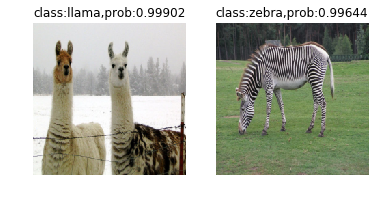

In [5]:
plt.subplot(121)
plt.imshow(a)
plt.title('class:{},prob:{:.5f}'.format(class_names[np.argmax(prob_[0])],prob_[0][np.argmax(prob_[0])]))
plt.axis('off')
plt.subplot(122)
plt.title('class:{},prob:{:.5f}'.format(class_names[np.argmax(prob_[1])],prob_[1][np.argmax(prob_[1])]))
plt.imshow(b)
plt.axis('off')
plt.show()